In [26]:
from plotting import import_data
from matplotlib import pyplot as plt; plt.style.use("ggplot")
import numpy as np

In [30]:
t_alt_primary,alt_primary = import_data("primary.csv",variable="altitude",n_avg=50)
t_alt_backup,alt_backup = import_data("backup.csv",variable="altitude",n_avg=50)
t_vel_primary,vel_primary = import_data("primary.csv",variable="velocity",n_avg=50)
t_vel_backup,vel_backup = import_data("backup.csv",variable="velocity",n_avg=50)

vel_primary = [i * 0.000889 for i in vel_primary] # convert fps to mach number
vel_backup = [i * 0.000889 for i in vel_backup]

prim = np.column_stack((np.array(t_alt_primary).T, np.array(alt_primary).T, np.array(vel_primary).T))
back = np.column_stack((np.array(t_alt_backup).T, np.array(alt_backup).T, np.array(vel_backup).T))



# np.savetxt("primary_filtered.csv",prim,delimiter=",")
# np.savetxt("backup_filtered.csv",back, delimiter=",")


In [31]:
# Read data from openrocket csv file
t_opr = []
alt_opr = []
vel_opr = []
with open("5mph_sim.csv","r") as f:
    for row in f:
        if row[0] != "#":
            row = row.split(",")
            t_opr.append(float(row[0]))
            alt_opr.append(float(row[1]))
            vel_opr.append(float(row[4]))


vel_opr = [i * 0.000889 for i in vel_opr] # convert fps to mach number


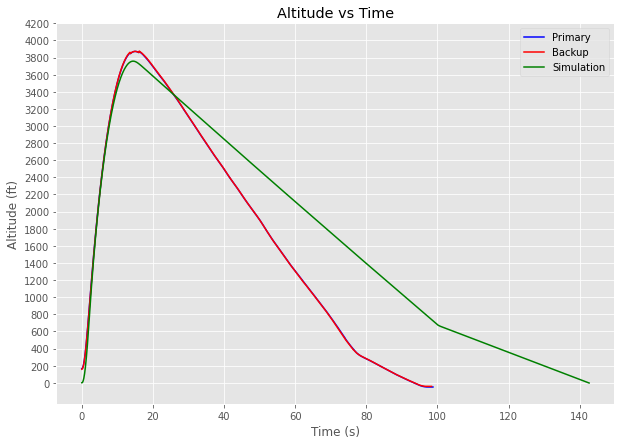

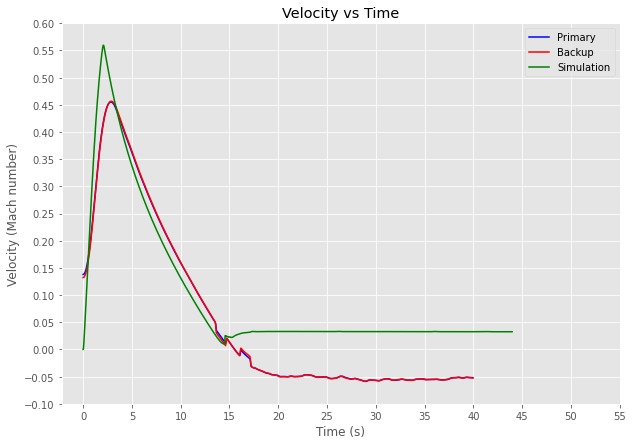

In [44]:
fig_alt, ax = plt.subplots(figsize=(10,7))
ax.plot(t_alt_primary,alt_primary,"-b",label="Primary")
ax.plot(t_alt_backup,alt_backup,"-r",label="Backup")
ax.plot(t_opr,alt_opr,'-g',label="Simulation")
ax.set(title="Altitude vs Time",xlabel="Time (s)",ylabel= "Altitude (ft)")
ax.legend()
plt.yticks(np.arange(0,4400,200))
# plt.xticks(np.arange(0,105,5))
plt.show()
fig_alt.savefig("altitude.png")




fig_vel, ax = plt.subplots(figsize=(10,7))
ax.plot(t_vel_primary[0:800],vel_primary[0:800],"-b",label="Primary")
ax.plot(t_vel_backup[0:800],vel_backup[0:800],"-r",label="Backup")
ax.plot(t_opr[0:400],vel_opr[0:400],'-g',label="Simulation")
ax.set(title="Velocity vs Time",xlabel="Time (s)",ylabel= "Velocity (Mach number)")
ax.legend()
plt.yticks(np.arange(-0.1,0.65,0.05))
plt.xticks(np.arange(0,60,5))
plt.show()
fig_vel.savefig("velocity.png")
